### 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.datasets.mnist import load_data
from tensorflow import keras
from sklearn.model_selection import train_test_split
np.random.seed(42)
tf.random.set_seed(42)

(x_data, y_data), (t_x_data, t_y_data) = load_data()
x_data.shape, np.unique(y_data)

((60000, 28, 28), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

### 데이터 전처리

In [2]:
x_data = x_data.reshape(-1, 28, 28, 1) / 255.0
tt_x = t_x_data.reshape(-1, 28, 28, 1) / 255.0
tt_y = t_y_data

t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

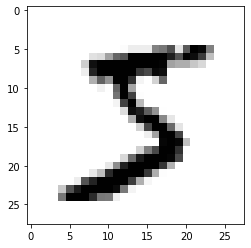

In [3]:
plt.imshow(x_data[0], cmap = 'gray_r')

### 모델 생성

In [4]:
m = keras.Sequential()
m.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
m.add(keras.layers.MaxPool2D(2))
m.add(keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
m.add(keras.layers.MaxPool2D(2))
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100, activation = 'relu'))
m.add(keras.layers.Dropout(0.3))
m.add(keras.layers.Dense(10, activation = 'softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               6

### 모델 학습

In [5]:
m.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best_q2m.h5', save_best_only = True)
e_st = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
m.fit(t_x, t_y, epochs = 20, validation_data = (v_x, v_y), callbacks = [ck_p, e_st])

Epoch 1/20
1500/1500 [==============================] - 82s 55ms/step - loss: 0.1587 - accuracy: 0.9515 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 2/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 3/20
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 4/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 5/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0413 - val_accuracy: 0.9896
Epoch 6/20
1500/1500 [==============================] - 77s 51ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0366 - val_accuracy: 0.9909
Epoch 7/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0479 -

### 검증 데이터를 통한 점수 출력

In [9]:
m.evaluate(v_x, v_y)

375/375 [==============================] - 4s 11ms/step - loss: 0.0337 - accuracy: 0.9917


[0.03373720869421959, 0.9916666746139526]

### 테스트 데이터를 이용해 결과 시각화

7


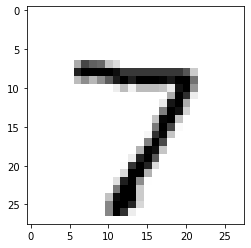


2


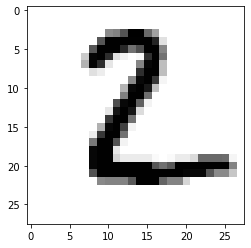


1


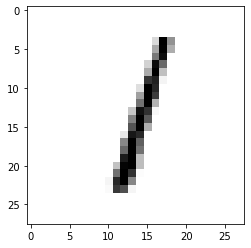


0


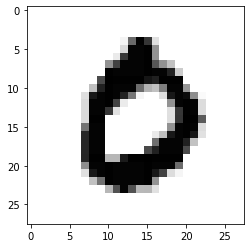


4


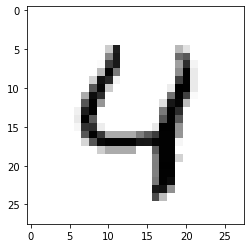

In [29]:
for i in range(5):
    rl = m.predict(tt_x[i:i+1])
    print(np.argmax(rl))
    plt.imshow(tt_x[i].reshape(28, 28), cmap = 'gray_r')
    plt.show()
    print()

### 테스트 데이터를 통한 점수

In [22]:
m.evaluate(tt_x, tt_y)

313/313 [==============================] - 4s 11ms/step - loss: 0.0238 - accuracy: 0.9923


[0.023752376437187195, 0.9922999739646912]

### 컨볼루션 1층 피쳐 시각화

In [24]:
conv_act1 = keras.Model(m.input, m.layers[0].output)

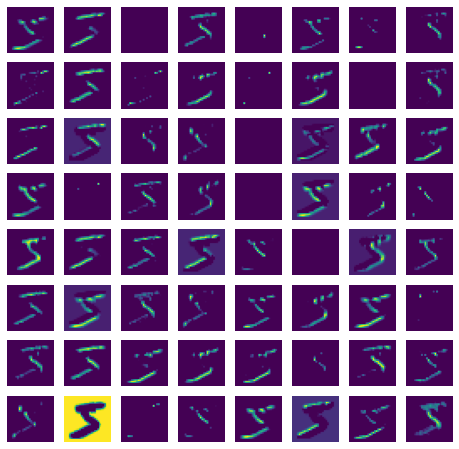

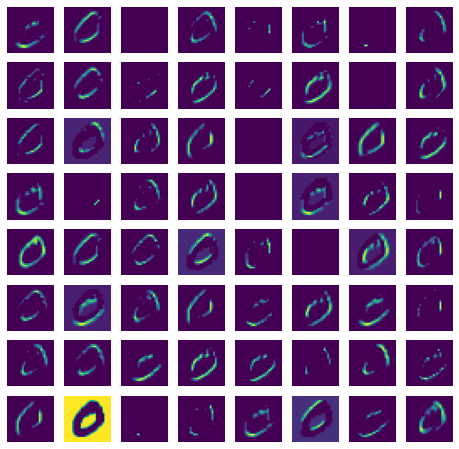

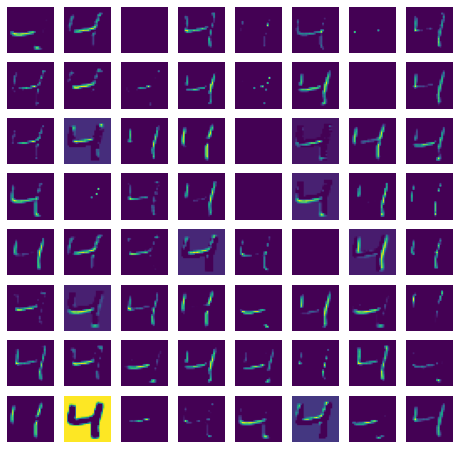

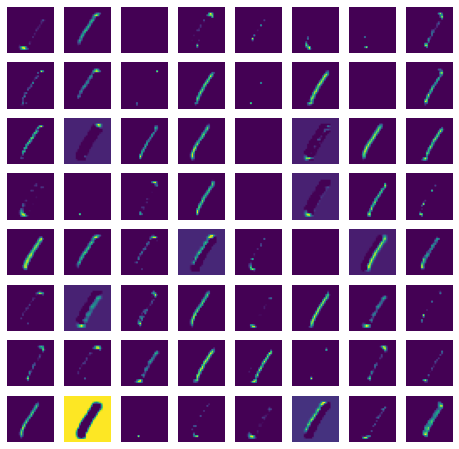

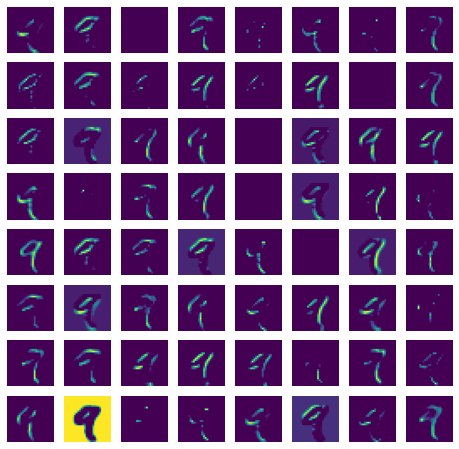

In [31]:
for x in range(5):
    f_map = conv_act1.predict(x_data[x:x+1])
    
    fig, axs = plt.subplots(8, 8, figsize = (8, 8))
    
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(f_map[0,:,:,i * 8 + j])
            axs[i, j].axis('off')

### 컨볼루션 2층 시각화

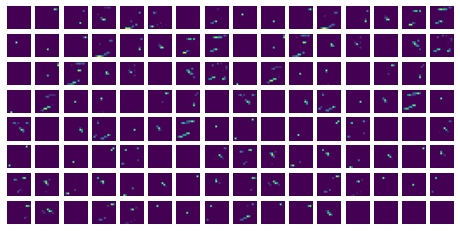

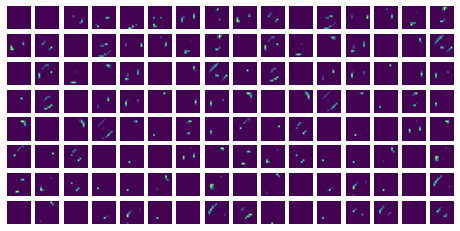

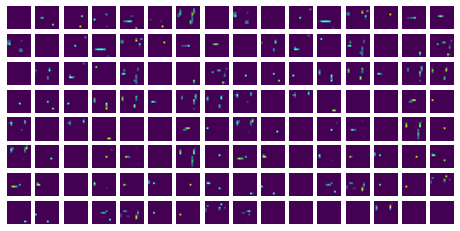

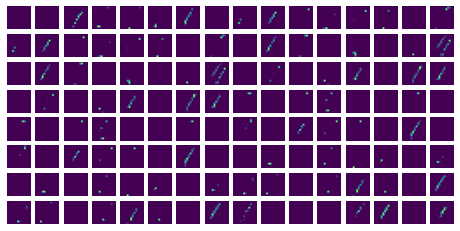

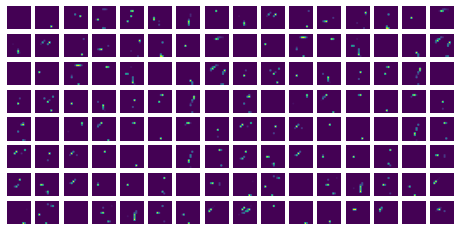

In [36]:
conv_act2 = keras.Model(m.input, m.layers[2].output)

for x in range(5):
    f2_map = conv_act2.predict(x_data[x:x+1])
    
    fig, axs = plt.subplots(8, 16, figsize = (8, 4))
    
    for i in range(8):
        for j in range(16):
            axs[i, j].imshow(f2_map[0,:,:,i * 8 + j])
            axs[i, j].axis('off')